In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset

df = pd.read_excel('TOC_Prediction_Dataset.xlsx')

In [3]:
df.head()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
0,219.713745,2.415151,3.151841,0.066973,0.228949,0.466486,0.057828
1,160.308606,2.430899,3.160330,0.034790,0.297078,0.544329,0.051316
2,149.944934,2.424665,4.087933,0.062167,0.311720,0.426713,0.055788
3,209.811890,2.394232,2.889251,0.087480,0.227958,0.479112,0.057745
4,167.492163,2.420244,2.881886,0.057664,0.302924,0.523564,0.052154


In [4]:
df.columns

Index(['Thickness_ft', 'Bulk Density_gg per cc', 'Resistivity_ohmsm',
       'Effective Porosity_Fraction', 'Clay Volume_ Fraction',
       'Water Saturation_Fraction', 'TOC_Fraction'],
      dtype='object')

In [5]:
# check missing values
df.isna().sum()

Thickness_ft                   0
Bulk Density_gg per cc         0
Resistivity_ohmsm              0
Effective Porosity_Fraction    0
Clay Volume_ Fraction          0
Water Saturation_Fraction      0
TOC_Fraction                   0
dtype: int64

In [6]:
df.shape

(987, 7)

In [7]:
# descriptive statistics
df.describe()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,150.448933,2.423001,3.892432,0.061492,0.271257,0.435876,0.052630
std,52.452284,0.019059,1.342193,0.014805,0.045289,0.080023,0.005062
min,50.218753,2.386117,1.680451,0.017432,0.153118,0.230041,0.030830
25%,123.462354,2.409469,3.120852,0.051250,0.238607,0.372234,0.051026
50%,141.662622,2.422639,3.650354,0.061158,0.264785,0.442414,0.053662
75%,166.707110,2.433418,4.319585,0.072289,0.303776,0.490972,0.056100
max,475.992627,2.540608,15.970625,0.096054,0.413083,0.683304,0.060907


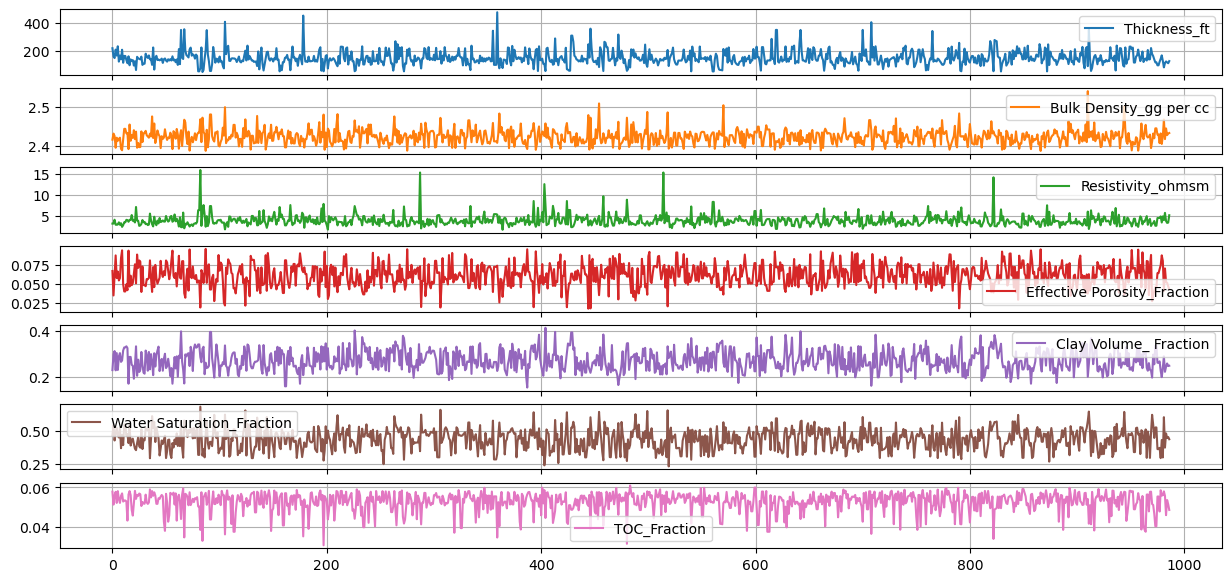

In [9]:
# visualize the dataset 
plt.style.use('default')
df.plot(subplots=True, grid=True, figsize=(15,7))
plt.show()

In [10]:
# assigning the feature values to X and target value to Y

X = df.drop(['TOC_Fraction'],axis=1)
Y = df['TOC_Fraction']

In [11]:
X.head()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction
0,219.713745,2.415151,3.151841,0.066973,0.228949,0.466486
1,160.308606,2.430899,3.160330,0.034790,0.297078,0.544329
2,149.944934,2.424665,4.087933,0.062167,0.311720,0.426713
3,209.811890,2.394232,2.889251,0.087480,0.227958,0.479112
4,167.492163,2.420244,2.881886,0.057664,0.302924,0.523564


In [12]:
Y.head()

0    0.057828
1    0.051316
2    0.055788
3    0.057745
4    0.052154
Name: TOC_Fraction, dtype: float64

#### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
seed = 1000
np.random.seed(seed)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

### Implement RandomForestRegressor Model

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
np.random.seed(seed)

rf = RandomForestRegressor(n_estimators=5000,criterion='mse',max_depth=None,min_samples_split=4,min_samples_leaf=2,
                          max_features='auto',bootstrap=True,n_jobs=-1)

In [17]:
# Train the model

rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', min_samples_leaf=2, min_samples_split=4,
                      n_estimators=5000, n_jobs=-1)

In [18]:
# Test the model

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [19]:
# Evaluating the model

corr_train = np.corrcoef(y_train,y_pred_train)[0,1]

print('Training Data R^2=',round(corr_train**2,4),'R=',round(corr_train,4))

Training Data R^2= 0.9659 R= 0.9828


In [20]:
# Evaluating the model

corr_test = np.corrcoef(y_test,y_pred_test)[0,1]

print('Testing Data R^2=',round(corr_test**2,4),'R=',round(corr_test,4))

Testing Data R^2= 0.8198 R= 0.9054


In [22]:
model_score = rf.score(x_test,y_test)

In [25]:
print(model_score*100)

80.91625962262397


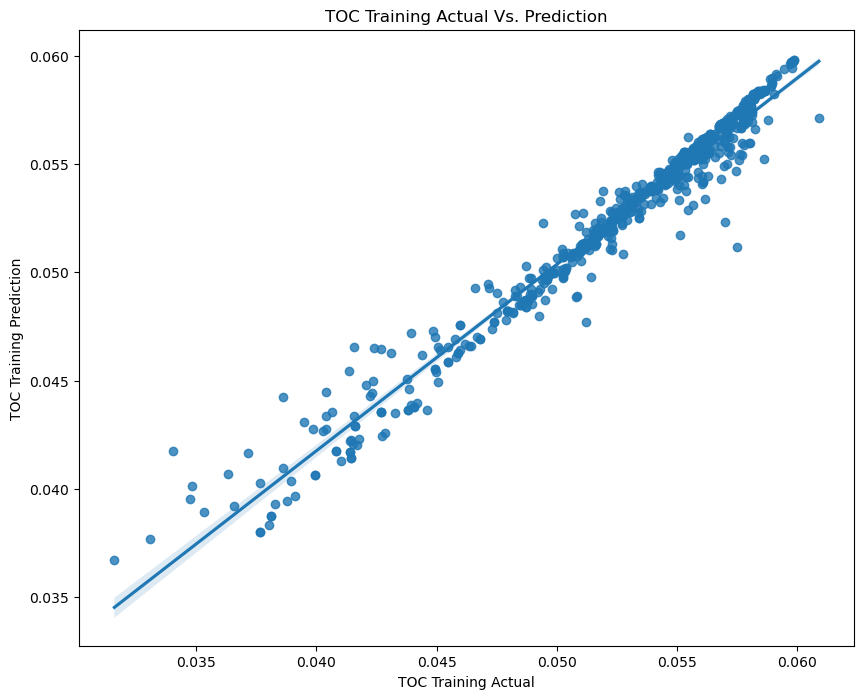

In [29]:
plt.style.use('default')
plt.figure(figsize=(10,8))
sns.regplot(y_train,y_pred_train,'r')
plt.xlabel('TOC Training Actual')
plt.ylabel('TOC Training Prediction')
plt.title('TOC Training Actual Vs. Prediction')
plt.show()

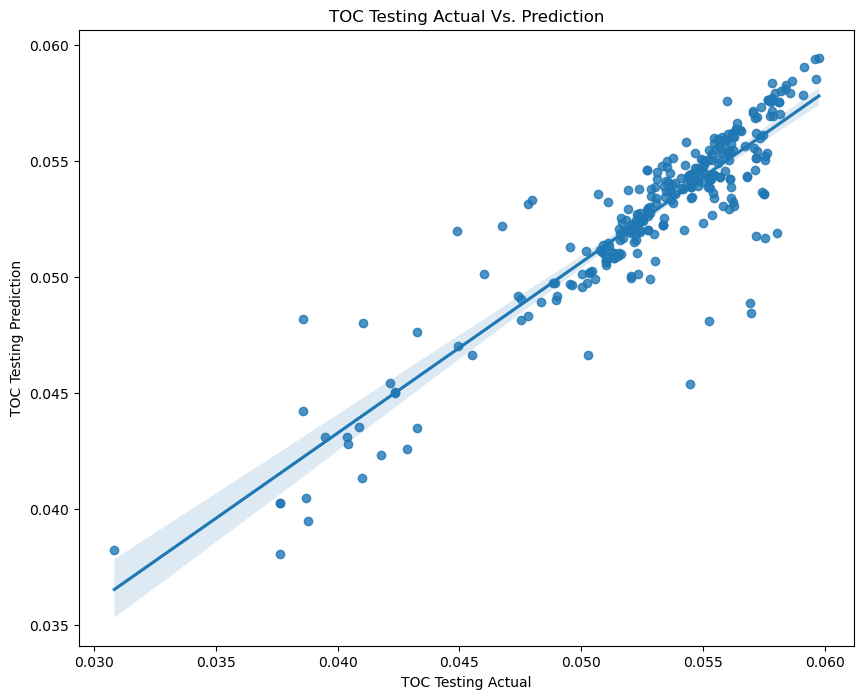

In [30]:
plt.style.use('default')
plt.figure(figsize=(10,8))
sns.regplot(y_test,y_pred_test,'r')
plt.xlabel('TOC Testing Actual')
plt.ylabel('TOC Testing Prediction')
plt.title('TOC Testing Actual Vs. Prediction')
plt.show()

In [31]:
TOC_Actual_Prediction = pd.DataFrame({'Actual':y_test,"Predicted":y_pred_test})
TOC_Actual_Prediction

,Actual,Predicted
834,0.051979,0.052064
604,0.053110,0.054183
747,0.057625,0.055334
908,0.057235,0.055417
545,0.054575,0.053413
...,...,...
809,0.056807,0.054341
166,0.054815,0.054128
172,0.058651,0.058411
263,0.058120,0.057536


In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [34]:
print("MAE:", round(mean_absolute_error(y_test,y_pred_test),5))
print('MSE:',round(mean_squared_error(y_test,y_pred_test),5))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred_test)),5))

MAE: 0.00117
MSE: 0.0
RMSE: 0.00201


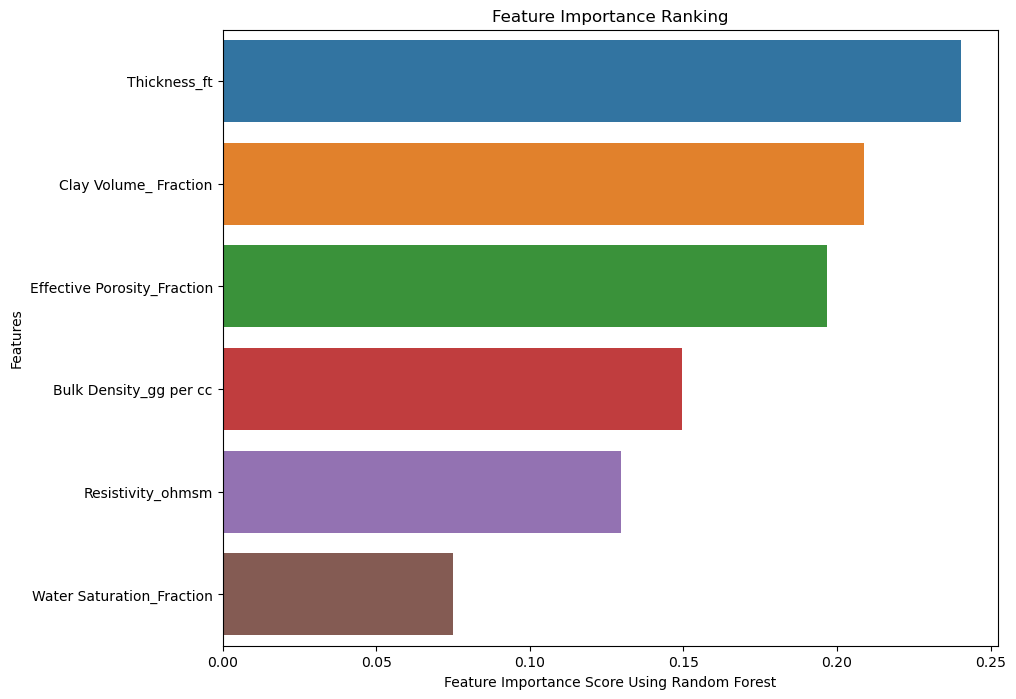

In [36]:
# Feature importances_
plt.style.use('default')
feature_names = df.columns[:-1]
plt.figure(figsize=(10,8))

feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Random Forest')
plt.ylabel('Features')
plt.title('Feature Importance Ranking')
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
np.random.seed(seed)

scores_R2 = cross_val_score(rf, X,Y, cv=5,scoring='r2')

In [39]:
print(scores_R2)

[0.76500527 0.78577342 0.74954037 0.82578635 0.75019841]
